<a href="https://colab.research.google.com/github/LeyloJohnny/Computational-Neuroscience/blob/main/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dimensionality reduction

### Access and understand data

Get data files:

In [2]:
#get data from google drive
!gdown --id 1LvD4yrrrNhc98udFEl59Aa3Z7w_xoZ6S
#unzip data
!unzip 'Leyla_Data.zip'

Downloading...
From: https://drive.google.com/uc?id=1LvD4yrrrNhc98udFEl59Aa3Z7w_xoZ6S
To: /content/Leyla_Data.zip
2.12MB [00:00, 67.9MB/s]
Archive:  Leyla_Data.zip
  inflating: default.py              
  inflating: GIF.pkl                 
  inflating: IAF.pkl                 
  inflating: simulate_EI_network_Minimum.py  
  inflating: BN.pkl                  


In [2]:
#show all data files
!ls
# BN : Balanced Network
# IAF: clustered wo SFA (Spikre-frequency adaptation)
# GIF: clusterd with SFA

BN.pkl	    GIF.pkl  Leyla_Data.zip  simulate_EI_network_Minimum.py
default.py  IAF.pkl  sample_data


In [ ]:
#what do the network parameters mean?
#!cat simulate_EI_network_Minimum.py  
#remove # before !cat to print simulation code


Get a list of data for all three models:

In [3]:
import pickle

#create a list of model name strings
models = ['BN.pkl', 'GIF.pkl', 'IAF.pkl']

#create a list of model names
model_names = ["Balanced Network", "Clusterd with SFA", "Clustered wo SFA"]

#create lists to store model data
models_x = []
models_y = []

#for all models
for i in range(len(models)):

  #open pickle file
  with open(models[i], 'rb') as f:
    #get x (actual data: time * neuron id)
    x = pickle.load(f)
    #get y (information on data, such as inhibitory/excitatory neurons, clusters, etc.)
    y = pickle.load(f)
    #add x and y to the models lists
    models_x.append(x)
    models_y.append(y)

What does the data look like?

In [4]:
#show y
models_y[0]

{'I_th_E': 2.13,
 'I_th_I': 1.24,
 'N_E': 4000,
 'N_I': 1000,
 'Q': 1,
 'delta_I_xE': 0.0,
 'delta_I_xI': 0.0,
 'dt': 0.001,
 'jplus': array([[1., 1.],
        [1., 1.]]),
 'n_jobs': 4,
 'neuron_type': 'iaf_psc_exp',
 'q_stc': [0.0008333333333333333],
 'record_from': 1,
 'record_voltage': False,
 'simtime': 5000,
 'tau_stc': [180.0],
 'warmup': 250}

In [5]:
#show x
#first model, both dimensions, 5 data points (time, neuron id)
models_x[0][:, :5]

array([[1.800e-02, 4.400e-02, 2.440e-01, 3.910e-01, 3.950e-01],
       [3.630e+02, 2.075e+03, 2.215e+03, 1.523e+03, 2.559e+03]])

How many neurons do we have?

In [6]:
#first model, second dimension (neuron id), get maximum from all values (neuron ids)
import numpy as np
np.max(models_x[0][1, :])

int(np.max(models_x[0][1, :]))
#5000 neurons (4000 ex., 1000 inh.)

4999

### Create raster plots from data for all three models

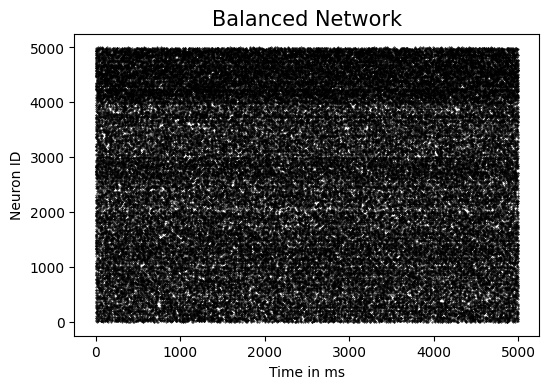

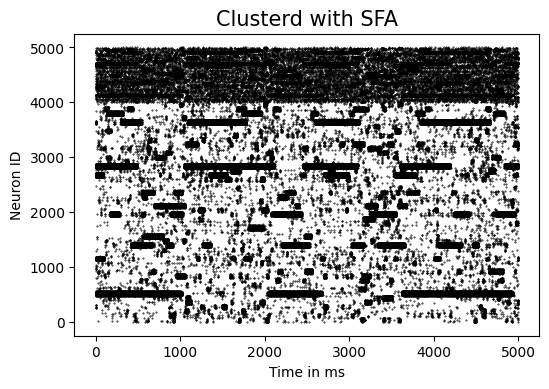

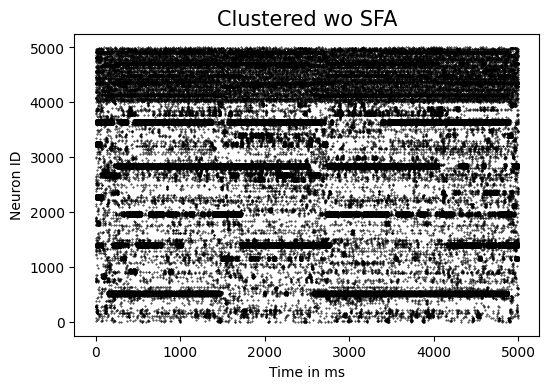

In [7]:
import matplotlib.pyplot as plt

#create list for all three raster plots
rasterplots = []

#for all models
for i in range(len(models)):

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(models_x[i][0],models_x[i][1],'.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[i], fontsize = 15)

  #store plots in list
  rasterplots.append(figure)


### Create spike count matrix

In [8]:
import numpy as np

#define a time window (in milliseconds)
window = 10

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(models_x[i][0, :]+ 1)/window)

#define which neurons to focus on (here: only excitatory neurons 0 - 4000)
neurons = int(np.max(models_x[i][1, :])+1) - 1000

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix = np.zeros((len(models), intervals, neurons))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(models_x[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, neurons))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(neurons):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == k)

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix[i] = spike_counts

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix.shape) + " representing " + 
      str(spike_count_matrix.shape[0]) + " models, " + str(spike_count_matrix.shape[1]) + " intervals, and " + str(spike_count_matrix.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix)

We have 500 intervals, each 10ms long. 

The spike count matrix has the shape: (3, 500, 4000) representing 3 models, 500 intervals, and 4000 neurons. 

Spike count matrix: 

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


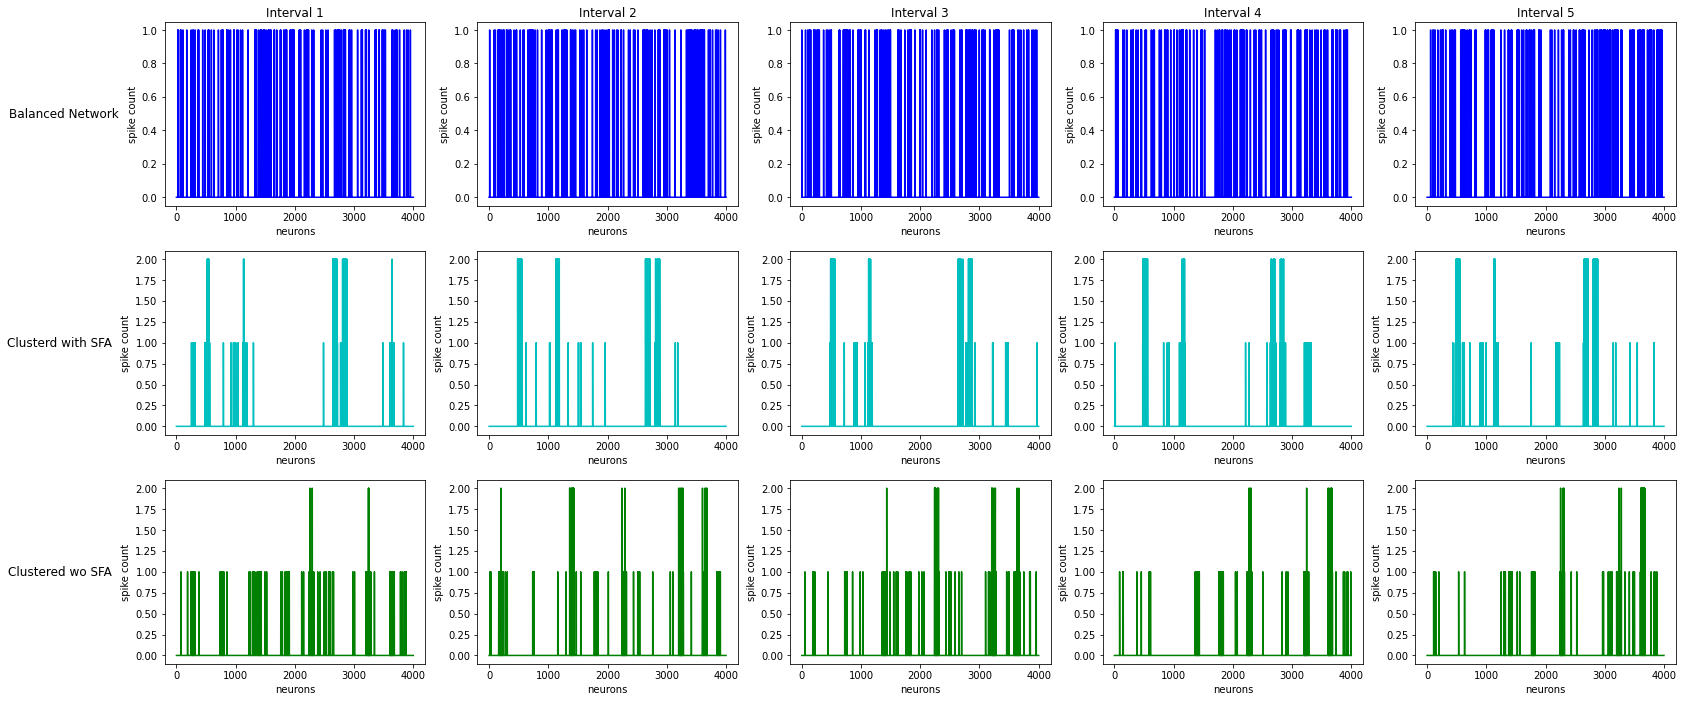

In [9]:
from matplotlib.transforms import offset_copy

if intervals > 5: 
  intervals_to_plot = 5

#initiate figure and axes with specific size, rows = number of models, columns = number of intervals
fig, axes = plt.subplots(figsize= (25, 10), nrows=len(models), ncols=intervals_to_plot)

#define title for columns and rows (intervals and model names)
cols = ['Interval {}'.format(int(col+1)) for col in range(intervals_to_plot)]
rows = ['{}'.format(row) for row in model_names]

#define x and y axes of each subplot (neurons and spike count)
plt.setp(axes.flat, xlabel='neurons', ylabel='spike count')

#define pad (required for spacing between subplots and labels)
pad = 5 # in points

#label columns
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

#labels rows
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

#arrange subplots 
fig.tight_layout()
# tight_layout doesn't take labels into account 
# more space needed:
fig.subplots_adjust(left = 0.15, top = 0.95)

#define colors for different models
colors = ['b', 'c', 'g']

#for every interval
for interval in range(intervals_to_plot):
  #for every model
  for model in range(len(models)):
    #make subplots, intervals in columns, models in rows, different color for every model
    #y axis: spike count (based on spike count matrix)
    #x axis: neurons (based on max. neuron id)
    axes[model, interval].plot(range(neurons), spike_count_matrix[model][interval], colors[model])

#show the figure
plt.show()

##PCA

In [10]:
#imports required for pca
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Generate dataframe:

In [11]:
#define titles for columns and rows in the dataframe that will be generated from the spike count matrix
cols = ['Neuron{}'.format(int(col+1)) for col in range(neurons)] #columns represent the neurons (= features)
rows = ['Interval{}'.format(int(row+1)) for row in range(intervals)] # rows represent the time intervals/time bins (= samples)

#create list for the data to be analyzed for each model
models_data = []

#for every model
for i in range(len(models)):
  #create a dataframe from the spike count matrix
  data = pd.DataFrame(data = spike_count_matrix[i], index = rows, columns = cols)
  #add the dataframe to the list (containing one dataframe per model)
  models_data.append(data)

#exemplarily show the dataframe for the second model
models_data[1].head(intervals)

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron3961,Neuron3962,Neuron3963,Neuron3964,Neuron3965,Neuron3966,Neuron3967,Neuron3968,Neuron3969,Neuron3970,Neuron3971,Neuron3972,Neuron3973,Neuron3974,Neuron3975,Neuron3976,Neuron3977,Neuron3978,Neuron3979,Neuron3980,Neuron3981,Neuron3982,Neuron3983,Neuron3984,Neuron3985,Neuron3986,Neuron3987,Neuron3988,Neuron3989,Neuron3990,Neuron3991,Neuron3992,Neuron3993,Neuron3994,Neuron3995,Neuron3996,Neuron3997,Neuron3998,Neuron3999,Neuron4000
Interval1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Interval498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.

###Perform PCA:

PCA chooses the minimum number of principal components such that a certain percentage of the variance is retained:

In [12]:
#create list for the pca results for each model
pca_results = []
#create list for the eigenvalues for each model
eigenvalues = []
#create list for the variance ratio for each model
variance_ratio = []
#create list for the number of principal components for each model
n_components = []

In [13]:
#define how much variance should be retained in the principal components (e.g. 95%)
pca = PCA(.9)

In [14]:
#for every model
for i in range(len(models)): 
  #standardize data: transform the data onto unit scale (mean = 0 and variance = 1)
  standardized = StandardScaler().fit_transform(models_data[i])
  #fit the data
  pca.fit(models_data[i])
  n_components.append(pca.n_components_)
  #print the number of principal components for each model
  print("Model " + str(i) + " has " + str(pca.n_components_) + " principal components.")

  #add eigenvalues to eigenvalue list
  eigenvalues.append(pca.explained_variance_)
  #add explained variance ratio to variance ratio list
  #variance_ratio.append(pca.explained_variance_ratio_)

  #get the pca results
  final_data = pca.transform(models_data[i])
  #add the resulting data to the list of results for each model
  pca_results.append(final_data)

Model 0 has 383 principal components.
Model 1 has 225 principal components.
Model 2 has 248 principal components.


Comparison of results based on PCA and dimensionality measure used by Mazzucato et al.

In [16]:
#for every model
for i in range(len(models)): 
  #how many principal components do we have?
  print("Model " + str(i) + " has " + str(n_components[i]) + " principal components.")
  #set the current value to zero
  current = 0

  #for every principal component
  for j in range(n_components[i]):
    #(eigenvalue/total amount of variance explained)²
    squared = (eigenvalues[i][j]/sum(eigenvalues[i][:]))**2
    #add the result to the current value
    current += squared

  #divide 1 by the sum of all results
  result = 1/current

  #print the results
  print("Model " + str(i) + " has " + str(int(result)) + " dimensions based on dimensionality measure used by Mazzucato et al.")

Model 0 has 383 principal components.
Model 0 has 329 dimensions based on dimensionality measure used by Mazzucato et al.
Model 1 has 225 principal components.
Model 1 has 13 dimensions based on dimensionality measure used by Mazzucato et al.
Model 2 has 248 principal components.
Model 2 has 19 dimensions based on dimensionality measure used by Mazzucato et al.


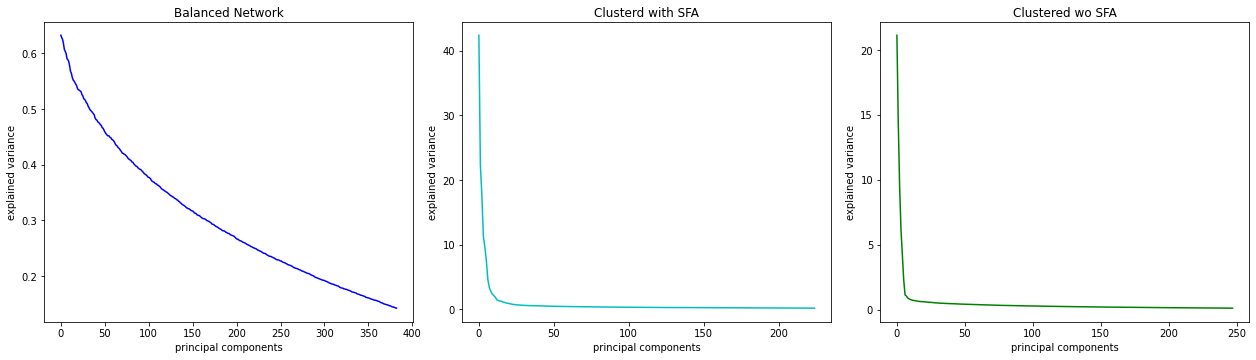

In [28]:
#initiate figure and axes
fig, axes = plt.subplots(figsize= (20, 5), nrows=1, ncols=len(models))

#define title for columns 
cols = ['{}'.format(col) for col in model_names]

#define x and y axes of each subplot (principal components and explained variance)
plt.setp(axes.flat, xlabel='principal components', ylabel='explained variance')

#define pad (required for spacing between subplots and labels)
pad = 5 # in points

#label columns
for ax, col in zip(axes, cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')


#arrange subplots 
fig.tight_layout()
# tight_layout doesn't take labels into account 
# more space needed:
fig.subplots_adjust(left = 0.15, top = 0.95)

#define colors for different models
colors = ['b', 'c', 'g']

#for every model
for model in range(len(models)):
  #make subplots, intervals in columns, models in rows, different color for every model
  #y axis: spike count (based on spike count matrix)
  #x axis: neurons (based on max. neuron id)
  axes[model].plot(range(n_components[model]), eigenvalues[model][:], colors[model])

#show the figure
plt.show() 